In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Loading the dataset
df = pd.read_csv('breast-cancer.csv')  # rename this if the file is differently named
print(df.head())
print(df.info())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [4]:
#Now we drop the unnecessary columns

cols_to_drop = ['id', 'Unnamed: 32']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# Encode diagnosis column
if 'diagnosis' in df.columns:
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Define features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from sklearn.svm import SVC

# Train an SVM with linear kernel
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict and evaluate
y_pred_linear = linear_svm.predict(X_test)

print("🔍 Linear Kernel Evaluation:\n")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))


🔍 Linear Kernel Evaluation:

[[68  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [8]:
# Train an SVM with RBF kernel
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)


SVC(C=1)

In [9]:
# Predict and evaluate
y_pred_rbf = rbf_svm.predict(X_test)

print("🔍 RBF Kernel Evaluation:\n")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


🔍 RBF Kernel Evaluation:

[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [10]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Perform grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("✅ Best Parameters Found:")
print(grid.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Best Parameters Found:
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


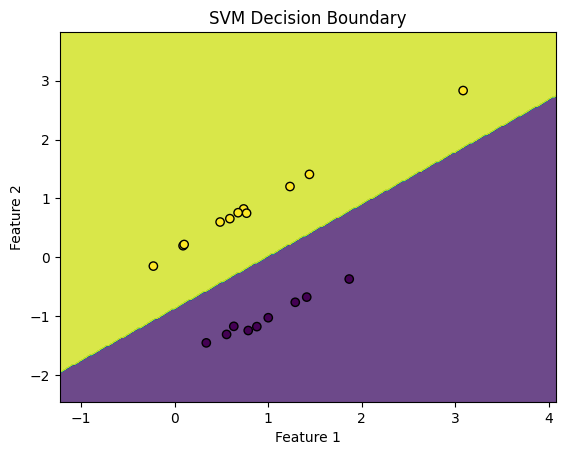

In [11]:
from sklearn.datasets import make_classification

# Create simple 2D dataset
X_vis, y_vis = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                                   n_clusters_per_class=1, random_state=42)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2)

# Train model
clf_vis = SVC(kernel='linear')
clf_vis.fit(X_train_vis, y_train_vis)

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X_test_vis, y_test_vis, clf_vis)
